# Imports

In [52]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Deep learning with TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

# Deep learning with PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision import models
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import resnet18, ResNet18_Weights

# Natural Language Processing (NLP)
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Miscellaneous
import os
import re
import time
import pickle
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

nltk.download('punkt')
nltk.download('stopwords')
torch.manual_seed(42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cuda


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading the Data

In [53]:
data = torch.load("/content/drive/My Drive/Machine Learning/COSMOS/FINAL_PROJECT/DER/cd-data.pt")

# for CREMA-D dataset
cd_data_spect = torch.load("/content/drive/My Drive/Machine Learning/COSMOS/FINAL_PROJECT/DER/cd-spect.pt")
cd_data_text = torch.load("/content/drive/My Drive/Machine Learning/COSMOS/FINAL_PROJECT/DER/cd-text.pt")
cd_data_frame = torch.load("/content/drive/My Drive/Machine Learning/COSMOS/FINAL_PROJECT/DER/cd-frame.pt")

# for Ekman-6 Dataset
ek_data_frame = torch.load("/content/drive/My Drive/Machine Learning/COSMOS/FINAL_PROJECT/DER/frame.pt")
ek_data_spect = torch.load("/content/drive/My Drive/Machine Learning/COSMOS/FINAL_PROJECT/DER/ek-spect.pt")
ek_data_text = torch.load("/content/drive/My Drive/Machine Learning/COSMOS/FINAL_PROJECT/DER/ek-text.pt", map_location = device)

# cutting the Ekman-6 dataset to Ekman-5
frames = []
spects = []
texts = []
for i in range(250):
  frames.append(ek_data_frame[i])
  spects.append(ek_data_spect[i])
  texts.append(ek_data_text[i])
ek_data_frame = torch.stack(frames)
ek_data_spect = torch.stack(spects)
ek_data_text = torch.stack(texts)

# just doing a sanity check
print(cd_data_spect.size())
print(cd_data_text.size())
print(cd_data_frame.size())
print(ek_data_frame.size())
print(ek_data_spect.size())
print(ek_data_text.size())

VOCAB = 4286

torch.Size([250, 3, 224, 224])
torch.Size([250, 6])
torch.Size([250, 10, 3, 224, 224])
torch.Size([250, 10, 3, 32, 32])
torch.Size([250, 3, 224, 224])
torch.Size([250, 1224])


In [54]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [55]:
sps = []
for i in range(250):
  sp = []
  for j in range(10):
    image = transforms.functional.to_pil_image(ek_data_frame[i][j])
    image = transform(image)
    sp.append(image)
  sp = torch.stack(sp)
  sps.append(sp)

sps = torch.stack(sps)
ek_data_frame = sps

In [56]:
print(ek_data_frame.size())

torch.Size([250, 10, 3, 224, 224])


In [57]:
# Resizing the CREMA-D dataset to having 1224 in each text
cd_texts = []
for i in range(250):
  arr = cd_data_text[i].numpy()
  for j in range(1224 - 6):
    arr = np.concatenate((arr, [0]))
  print(len(arr))
  cd_texts.append(torch.Tensor(arr))

cd_data_text = torch.stack(cd_texts)

# sanity check
print(cd_data_text.size())

1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224


In [58]:
b_size = 10
train_len = (int)(0.9 * len(data))
train_dataset, test_dataset = torch.utils.data.random_split(data, [train_len, len(data) - train_len])
train_loader = DataLoader(train_dataset, batch_size = b_size, shuffle = True, pin_memory = True, num_workers = 2)
test_loader = DataLoader(test_dataset, batch_size = b_size, shuffle = True, pin_memory = True, num_workers = 2)

In [59]:
cd_data_textl = torch.load("/content/drive/My Drive/Machine Learning/COSMOS/FINAL_PROJECT/DER/cd-textl.pt")
text_lengths = []

for i in range(250):
  MXLEN = 1224
  ith_length = MXLEN
  for j in range(MXLEN):
    if ek_data_text[i][j].item() == 0:
      ith_length = j
      break
  text_lengths.append(ith_length)

for i in range(250):
  text_lengths.append(cd_data_textl[i].item())

print(len)

print(len(text_lengths))

<built-in function len>
500


# Model Definition

3D-CNN

In [60]:
class CNN3d(nn.Module):
  def __init__(self, dropout_prob = 0.5):
    super(CNN3d, self).__init__()
    self.c1 = nn.Conv3d(3, 6, kernel_size = 4, padding = 1, stride = 2)
    self.c2 = nn.Conv3d(6, 16, kernel_size = 4, padding = 1, stride = 2)
    # 16 x 2 x 56 x 56
    self.flatten = nn.Flatten()
    self.fc = nn.Sequential(
      nn.Linear(16 * 2 * 56 * 56, 128),
      nn.Dropout(dropout_prob),
      nn.Linear(128, 64),
      nn.Dropout(dropout_prob),
      nn.Linear(64, 5),
      nn.ReLU()
    )

  def forward(self, x):
    x = self.c1(x)
    x = self.c2(x)
    x = nn.functional.relu(x)
    x = self.flatten(x)
    x = self.fc(x)
    return x

LSTM

In [61]:
class LSTM_Classifier(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
    super(LSTM_Classifier, self).__init__()
    # Embedding layer converts integer sequences to vector sequences
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    # LSTM layer process the vector sequences
    self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers = n_layers, bidirectional = bidirectional, dropout = dropout, batch_first = True)
    #                     input           output                             bisexual?                      dropout_prob      whether or not batch_size comes first in the tensor.size()
    # Dense layer to predict
    self.fc = nn.Linear(hidden_dim * (2 if bidirectional == True else 1), output_dim)
    # Prediction activation function
    self.sigmoid = nn.Sigmoid()

  def forward(self, text, text_lengths):
    embedded = self.embedding(text) # embedded version
    # Thanks to packing, LSTM don't see padding tokens
    # and this makes our model better
    packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths, batch_first=True, enforce_sorted = False)
    packed_output, (hidden_state, cell_state) = self.lstm(packed_embedded)
    # Concatenating the final forward and backward hidden states
    hidden = torch.cat((hidden_state[-2,:,:], hidden_state[-1,:,:]), dim = 1)
    dense_outputs = self.fc(hidden)
    #Final activation function
    dense_outputs = nn.functional.relu(dense_outputs)
    return dense_outputs

Combiner Module

In [62]:
class Smash(nn.Module):
  def __init__(self, dropout_prob = 0.5):
    super(Smash, self).__init__()
    self.fcnn = nn.Sequential(
      nn.Linear(15, 10),
      nn.Dropout(dropout_prob),
      nn.ReLU(),
      nn.Linear(10, 5)
    )
    self.bilstm = LSTM_Classifier(vocab_size = VOCAB + 1,
                         embedding_dim = 100,
                         hidden_dim = 64,
                         output_dim = 5,
                         n_layers = 5,
                         bidirectional = True,
                         dropout = 0.5).to(device)
    self.resn = resnet18(num_classes = 5)
    self.cnn = CNN3d()

  def forward(self, x1, x2, tlengths, x3):
    x1 = self.resn(x1)
    x2 = self.bilstm(x2, tlengths)
    x3 = self.cnn(x3)
    x1 = torch.cat((x1, x2, x3), dim = -1)
    x1 = self.fcnn(x1)
    return x1

# Helper Functions

In [63]:
def get_text(i):
  if i < 250:
    return ek_data_text[i].to(device)
  else:
    return cd_data_text[i - 250].to(device)

def get_frame(i):
  if i < 250:
    return ek_data_frame[i].to(device)
  else:
    return cd_data_frame[i - 250].to(device)

def get_spect(i):
  if i < 250:
    return ek_data_spect[i].to(device)
  else:
    return cd_data_spect[i - 250].to(device)

# Training Loop

In [67]:
model = Smash().to(device)

epochs = 100
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
loss_fn = nn.CrossEntropyLoss()

tl = []

for i in range(epochs):
  model.train()
  train_loss = 0.00
  correct = 0.00
  total = 0.00
  for indices, label in train_loader:
    indices = indices.long().to(device)
    label = label.long().to(device)

    # getting the text for the index-th video
    text_batch = []
    for index in indices:
      text = get_text(index.cpu()).long()
      # if the text ends up being nothing
      if text_lengths[index] == 0:
        text[0] = 1
        # dimensionality voodoo
        text_lengths[index] = 1
      text_batch.append(text)
    text_batch = torch.stack(text_batch)
    text_batch = text_batch.squeeze(1)

    # getting the spectrograms
    spect_batch = []
    for index in indices:
      spect = get_spect(index.cpu())
      spect.requires_grad = True
      spect_batch.append(spect)
    spect_batch = torch.stack(spect_batch)
    spect_batch = spect_batch.squeeze(1)

    # getting all of the frames
    frame_batch = []
    for index in indices:
      frames = get_frame(index.cpu())
      frames = frames.squeeze(0)
      #print(frames.size())
      frame_batch.append(frames)
    frame_batch = torch.stack(frame_batch)
    frame_batch = torch.transpose(frame_batch, 1, 2)
    #print(frame_batch.size())

    # getting the text lengths
    textl = []
    for index in indices:
      textl.append(text_lengths[index])

    # zero-ing gradients
    optimizer.zero_grad()

    # output of the final NN on the super-tensor
    y_pred = model(spect_batch, text_batch, textl, frame_batch).to(device)

    # creating one-hot vector for the label for the index-th video
    labels = torch.full((b_size, 5,), 0.00).cuda()
    for j in range(b_size):
      labels[j][label[j]] = 1.00

    # computing the Cross Entropy Loss and backpropagating
    #print(y_pred.size())
    #print(labels.size())
    loss = loss_fn(y_pred, labels)
    loss.backward()

    # updating gradients
    optimizer.step()

    # statistics
    train_loss += loss.item()/len(train_loader)
    prediction = y_pred.argmax(dim=1)
    label = label.squeeze(1)
    correct += (prediction.eq(label).sum()).item()
    total += label.size(0)

  print(correct, total)
  # more statistics
  tl.append(train_loss)
  print(f"Epoch: {i+1}/{epochs}, Training Loss: {train_loss:.4f}, Training Accuracy: {correct/total:.4f}")

100.0 450.0
Epoch: 1/100, Training Loss: 1.6042, Training Accuracy: 0.2222
107.0 450.0
Epoch: 2/100, Training Loss: 1.5515, Training Accuracy: 0.2378
135.0 450.0
Epoch: 3/100, Training Loss: 1.5142, Training Accuracy: 0.3000
151.0 450.0
Epoch: 4/100, Training Loss: 1.4796, Training Accuracy: 0.3356
162.0 450.0
Epoch: 5/100, Training Loss: 1.4320, Training Accuracy: 0.3600
166.0 450.0
Epoch: 6/100, Training Loss: 1.4129, Training Accuracy: 0.3689
190.0 450.0
Epoch: 7/100, Training Loss: 1.3039, Training Accuracy: 0.4222
188.0 450.0
Epoch: 8/100, Training Loss: 1.2933, Training Accuracy: 0.4178
222.0 450.0
Epoch: 9/100, Training Loss: 1.2101, Training Accuracy: 0.4933
244.0 450.0
Epoch: 10/100, Training Loss: 1.1507, Training Accuracy: 0.5422
246.0 450.0
Epoch: 11/100, Training Loss: 1.1268, Training Accuracy: 0.5467
250.0 450.0
Epoch: 12/100, Training Loss: 1.0464, Training Accuracy: 0.5556
266.0 450.0
Epoch: 13/100, Training Loss: 0.9883, Training Accuracy: 0.5911
272.0 450.0
Epoch: 14

# Validation Loop

Validation Loss: 0.1525
Validation Accuracy: 0.4800


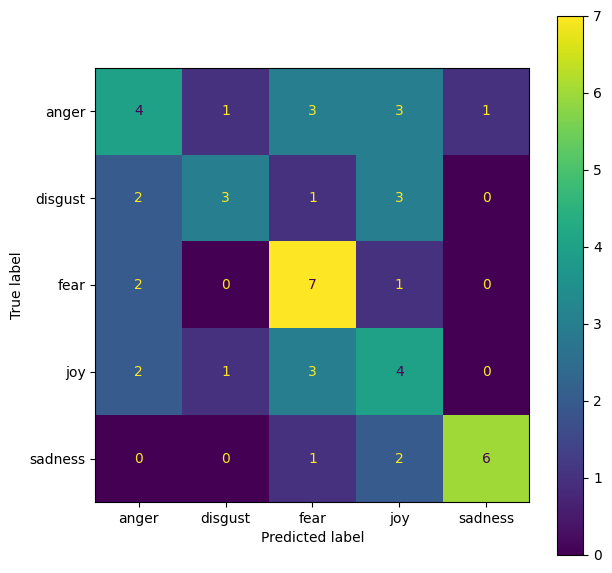

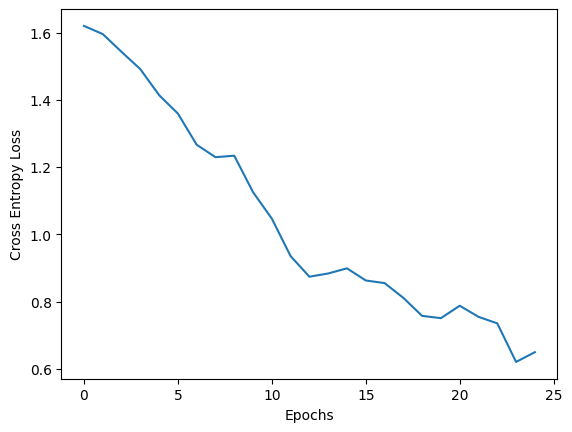

In [65]:
from sklearn import metrics

predicts = []
corrects = []

with torch.no_grad():
  model.train()
  train_loss = 0.00
  correct = 0.00
  total = 0.00
  for indices, label in test_loader:
    indices = indices.long().to(device)
    label = label.long().to(device)

    # getting the text for the index-th video
    text_batch = []
    for index in indices:
      text = get_text(index.cpu()).long()
      # if the text ends up being nothing
      if text_lengths[index] == 0:
        text[0] = 1
        # dimensionality voodoo
        text_lengths[index] = 1
      text_batch.append(text)
    text_batch = torch.stack(text_batch)
    text_batch = text_batch.squeeze(1)

    # getting the spectrograms
    spect_batch = []
    for index in indices:
      spect = get_spect(index.cpu())
      spect.requires_grad = True
      spect_batch.append(spect)
    spect_batch = torch.stack(spect_batch)
    spect_batch = spect_batch.squeeze(1)

    # getting all of the frames
    frame_batch = []
    for index in indices:
      frames = get_frame(index.cpu())
      frames = frames.squeeze(0)
      #print(frames.size())
      frame_batch.append(frames)
    frame_batch = torch.stack(frame_batch)
    frame_batch = torch.transpose(frame_batch, 1, 2)
    #print(frame_batch.size())

    # getting the text lengths
    textl = []
    for index in indices:
      textl.append(text_lengths[index])

    # output of the final NN on the super-tensor
    y_pred = model(spect_batch, text_batch, textl, frame_batch).to(device)

    # creating one-hot vector for the label for the index-th video
    labels = torch.full((b_size, 5,), 0.00).cuda()
    for j in range(b_size):
      labels[j][label[j]] = 1.00

    # computing the Cross Entropy Loss and backpropagating
    loss = loss_fn(y_pred, labels)

    # statistics
    train_loss += loss.item()/len(train_loader)
    prediction = y_pred.argmax(dim=1)
    label = label.squeeze(1)
    correct += (prediction.eq(label).sum()).item()
    total += label.size(0)

    # confusion matrix
    for i in range(b_size):
      predicts.append(prediction[i].item())
      corrects.append(label[i].item())

print(f"Validation Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {correct/total:.4f}")

mapping = ["anger", "disgust", "fear", "joy", "sadness"]

confucian = metrics.confusion_matrix(corrects, predicts)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confucian, display_labels = mapping)
fig, ax = plt.subplots(figsize=(7,7))
cm_display.plot(ax = ax)
plt.show()

plt.plot(tl)
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.show()